In [1]:
"""
Objective:
1. Predict the best accuracy of classifing model of Machine Learning
2. Predict what features effect the quality of the white wine

Classifying model of Machine Learning that use:
1. Decision Tree classifier
2. Random Forest classifier
3. ADABoost classifier
4. Gradient Boost
5. XGBoost classifier
6. Stochastic Gradient Descent classifier
7. Support Vector classifier

Result:
1. Best classifier accuracy is Random forest and XGBoost, both accuracy = 92%
2. Features effect the quality of wine is Alcohol
"""

#Importing required packages.
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')

# See the number of rows and columns
print("columns, Rows: " + str(df.shape))

# See the first five rows of the dataset
df.head()

columns, Rows: (4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# Missing Values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


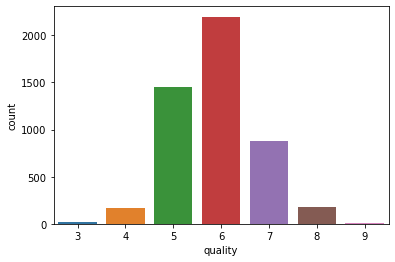

In [4]:
sns.countplot(df['quality'])

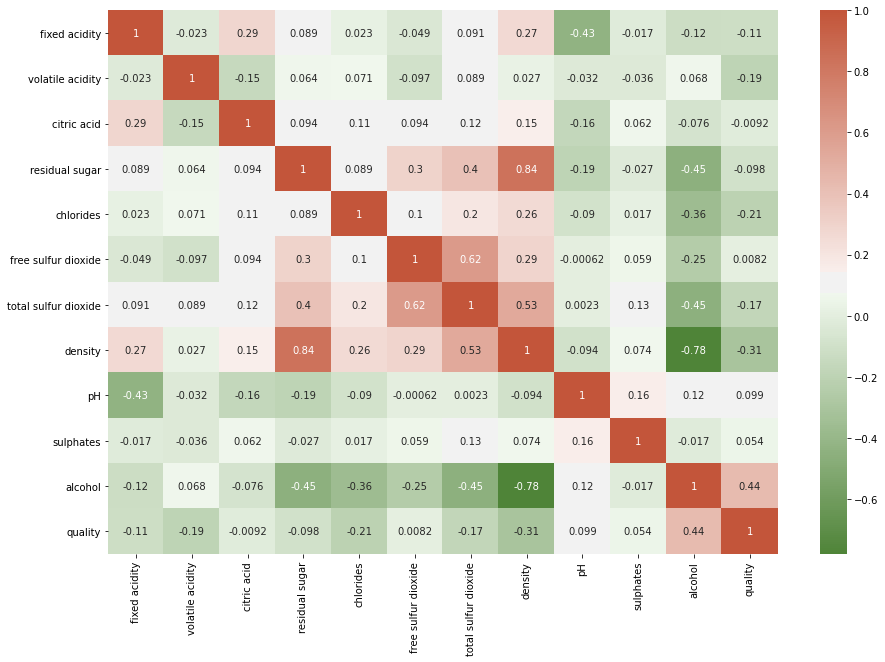

In [5]:
corr = df.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(120, 20, as_cmap=True))

In [6]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [7]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

0    3838
1    1060
Name: goodquality, dtype: int64

In [8]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [9]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [10]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       963
           1       0.58      0.57      0.58       262

    accuracy                           0.82      1225
   macro avg       0.73      0.73      0.73      1225
weighted avg       0.82      0.82      0.82      1225



In [11]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       963
           1       0.76      0.53      0.63       262

    accuracy                           0.86      1225
   macro avg       0.82      0.74      0.77      1225
weighted avg       0.86      0.86      0.85      1225



In [12]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       963
           1       0.52      0.35      0.42       262

    accuracy                           0.79      1225
   macro avg       0.68      0.63      0.65      1225
weighted avg       0.77      0.79      0.78      1225



In [13]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       963
           1       0.68      0.39      0.50       262

    accuracy                           0.83      1225
   macro avg       0.77      0.67      0.70      1225
weighted avg       0.82      0.83      0.81      1225



In [14]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       963
           1       0.72      0.59      0.65       262

    accuracy                           0.86      1225
   macro avg       0.81      0.77      0.78      1225
weighted avg       0.86      0.86      0.86      1225



In [15]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       963
           1       0.40      0.08      0.14       262

    accuracy                           0.78      1225
   macro avg       0.60      0.52      0.51      1225
weighted avg       0.71      0.78      0.72      1225



In [16]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
pred_svc= svc.predict(X_test)

print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       963
           1       0.68      0.32      0.44       262

    accuracy                           0.82      1225
   macro avg       0.76      0.64      0.67      1225
weighted avg       0.81      0.82      0.80      1225



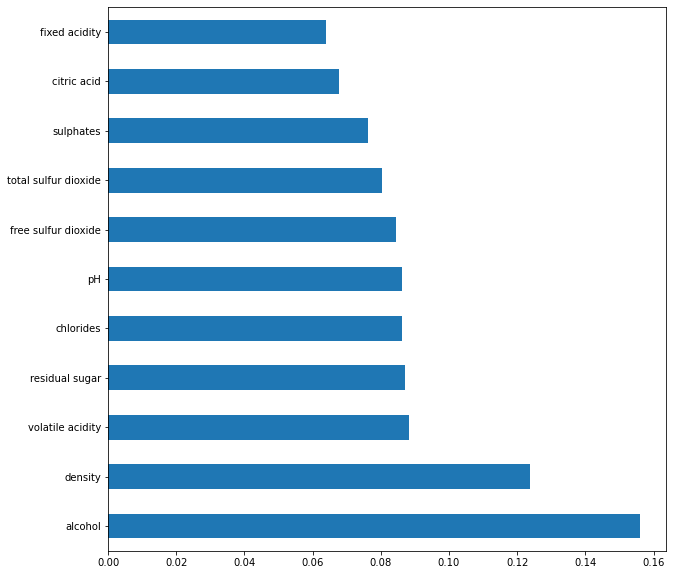

In [17]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

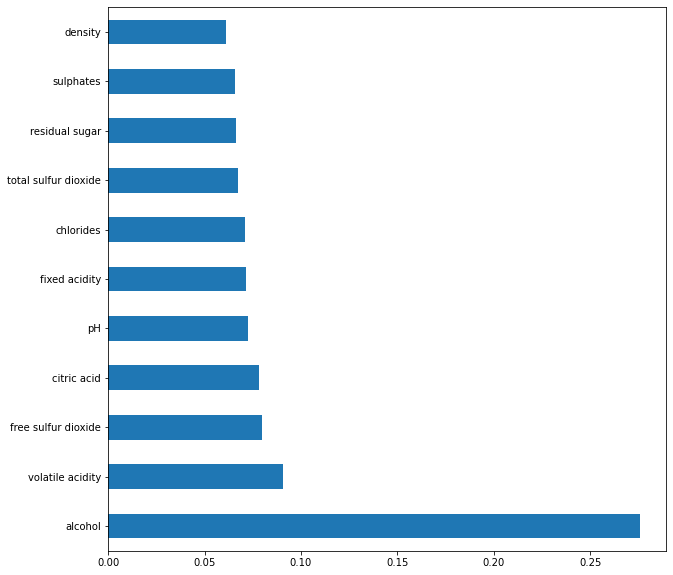

In [18]:
feat_importances = pd.Series(model5.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))